In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Files to Load 
whr ="../Resources/whr_2016_cleaned.csv"
hdi = "../Resources/HDI_Data_cleaned.csv"

# Read whr and hdi data
whr_df = pd.read_csv(whr)
hdi_df = pd.read_csv(hdi)

hdi_df = hdi_df[['Country', 'country code', 'HDI 2016']]

hdi_df.rename(
    columns={
        "country code": "Country_Code",
    },
    inplace=True)

whr_df.rename(
    columns={
        "country code": "Country_Code",
    },
    inplace=True)



In [2]:
# Combine the data into a single dataset
whr_df = whr_df[['Country', 'Country_Code', 'Happiness Score']]

whr_df = whr_df[whr_df.Country_Code != '*unk']
hdi_df = hdi_df[hdi_df.Country_Code != '*unk']


whr_hdi_df = pd.merge(whr_df, hdi_df, how="inner", on=["Country_Code", "Country_Code"])

whr_hdi_df.rename(
    columns={
        "Country_x": "Country",
    },
    inplace=True)

whr_hdi_df = whr_hdi_df[['Country', 'Country_Code', 'Happiness Score', 'HDI 2016']]

whr_hdi_df.to_csv('../Resources/whr_hdi.csv')

# Display the data table for preview
whr_hdi_df.head()

,Country,Country_Code,Happiness Score,HDI 2016
0,Denmark,DNK,7.526,0.928
1,Switzerland,CHE,7.509,0.943
2,Iceland,ISL,7.501,0.933
3,Norway,NOR,7.498,0.951
4,Finland,FIN,7.413,0.918


In [3]:
x_axis = whr_hdi_df["Happiness Score"]
y_axis = whr_hdi_df ["HDI 2016"]

slope, intercept, r, p, std_err = stats.linregress(
    x_axis, y_axis)
fit = slope * x_axis + intercept
r_squared = r**2
print(r_squared)

0.6886044344739949


Text(0.5, 0, 'Happiness Score')

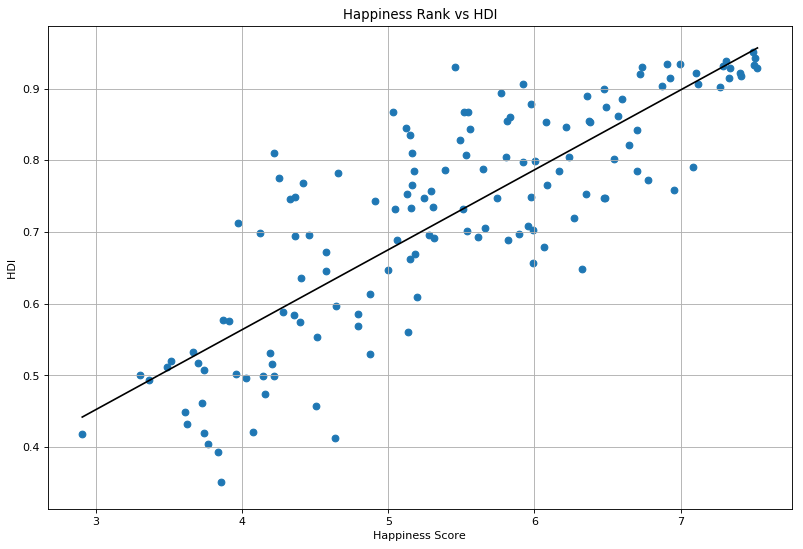

In [4]:
plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(x_axis, y_axis, marker="o")
plt.plot(x_axis, fit, '-k')
plt.grid(True)

plt.title("Happiness Rank vs HDI")
plt.ylabel("HDI ")
plt.xlabel("Happiness Score")

# for i, txt in enumerate(x_axis):
#     plt.annotate(whr_hdi_df["Country_Code"][i], (x_axis[i], y_axis[i]))

In [5]:
#Looking for the outliers
whr_hdi_df["Distance"] = whr_hdi_df["HDI 2016"] - fit
whr_hdi_df
#These should be happier!
whr_hdi_df.nlargest(5, ['Distance']) 

,Country,Country_Code,Happiness Score,HDI 2016,Distance
114,Bulgaria,BGR,4.217,0.810,0.221844
69,Hong Kong,HKG,5.458,0.930,0.203639
89,Greece,GRC,5.033,0.868,0.188970
112,Georgia,GEO,4.252,0.776,0.183946
104,Sri Lanka,LKA,4.415,0.768,0.157793


In [6]:
#These should be sadder!
whr_hdi_df.nsmallest(5, ['Distance']) 

,Country,Country_Code,Happiness Score,HDI 2016,Distance
98,Sierra Leone,SLE,4.635,0.413,-0.221707
126,Niger,NER,3.856,0.351,-0.196953
36,Guatemala,GTM,6.324,0.649,-0.173803
102,Ethiopia,ETH,4.508,0.457,-0.163564
127,South Sudan,SSD,3.832,0.394,-0.151280
